# 2019 StudentMoveTO Survey Data - Tabulation and Segmentation

In this notebook, we tabulate the data from the 2019 StudentMoveTO Survey. This includes paying specific attention to factors such as age, gender, and the distribution of respondents by affiliated university and campus.

In [19]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv('../Data/SMTO_2019/SMTO_2019_Respondents.csv')
df1 = pd.read_csv('../Data/SMTO_2019/SMTO_2019_Households.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



# 1. Respondents File

This section of the tabulation was done with data from `SMTO_2019_Respondents.csv`.

In [2]:
df.head()

,UniquePsKey_,PsKey_,psgender,psage,psinstitution,psinternationalstudent,psdisability,psuniversityaffiliation,personstatusgrad,personstatustime,...,psfrequencycommute,psfrequencytelecommute,pswenttoschoolinpastmonth,PsPastMonthRidehailFrequency,PsPastMonthBikeFrequency,PsPastMonthTransitFrequency,PsPastMonthWalkFrequency,PsPastMonthDriveFrequency,psagreeothersurveys,psparticipateprize
0,1,9,Male,26.0,Centennial College,Yes,No,NaN,NaN,NaN,...,4.0,0.0,Yes,Not at all,Not at all,Almost everyday,Not at all,Not at all,Yes,NaN
1,2,11,Female,25.0,Centennial College,No,No,NaN,NaN,NaN,...,2.0,0.0,Yes,Not at all,Not at all,Once or more a week,Not at all,Not at all,No,NaN
2,3,14,Male,19.0,Centennial College,No,No,NaN,NaN,NaN,...,5.0,1.0,Yes,Not at all,Not at all,Almost everyday,Not at all,Not at all,No,No
3,4,16,Female,25.0,Centennial College,Yes,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
4,5,17,Female,97.0,Centennial College,No,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN


In [3]:
df.shape

(19135, 61)

The sample size has increased from 2015 where we had __15,226__ respondents to 2019 where we now have __19,135__.

To look at distributions, we will used the the following function:

In [4]:
def show_distribution(col_name,attribute):
    # Include quotations on col_name and attribute
    attrib = list(df[col_name].value_counts().index)
    counts = list(df[col_name].value_counts())
    percnt = list(df[col_name].value_counts(normalize = True))
    print(attribute + "\t\tCounts\tPercentage(%)\n")
    for i in range(len(attrib)):
        print(str(attrib[i])[:7] + '\t\t' + str(counts[i]) + '\t' + str(percnt[i]))

### 1.1 Gender Distribution:

In [5]:
show_distribution('psgender','Gender')
list(df['psgender'].unique())

Gender		Counts	Percentage(%)

Female		12744	0.6660047034230467
Male		5905	0.3085968121243794
Prefer 		253	0.013221844787039456
Non bin		233	0.012176639665534362


['Male', 'Female', 'Prefer not to answer', 'Non binary / third gender']

We still have a much higher number of females than males in this dataset. In 2015 we had a 67/32% of Female/Male respondents and in 2019 we have a 67/31%. We also have the Addition of a 'Prefer not to answer' option.

### 1.2 Age Distribution:

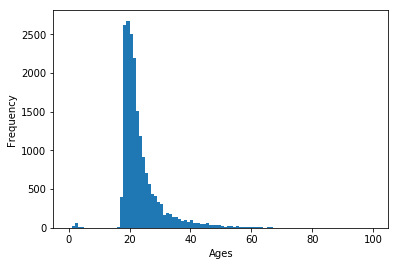

In [6]:
temp_df = df[df['psage'] < 200]
numBins = 100
plt.figure()
temp_df['psage'].plot.hist(bins=numBins)
plt.xlabel('Ages')
plt.show()

In [7]:
(df["psage"] == 999).value_counts()

False    19068
True        67
Name: psage, dtype: int64

We see that the majority of respondents reported ages between 19 and 25 years old. However, there are reported ages ranging from 0 to 99. Respondents who reported such ages may have been relucatant to report their actual age.

Since we also have access to the repondent's reported age group, let's see if the reported age groups accurately reflect the reported ages:

### 1.3 University/College & Campus Distributions:

In [8]:
headers = ['psinstitution','pscampusmain']
for i in range(2):
    print("\n-> " + headers[i] + ":")
    print(df[headers[i]].value_counts())
    print("")


-> psinstitution:
University of Toronto      5413
Ryerson University         4090
York University            2386
McMaster University        1756
Centennial College         1234
Durham College             1225
Sheridan College           1168
Ontario Tech University     738
Mohawk College              687
OCAD University             438
Name: psinstitution, dtype: int64


-> pscampusmain:
St. George Campus                              3571
Keele Campus                                   2062
McMaster Campus                                1601
Oshawa Campus                                   916
Scarborough Campus                              761
Mississauga Campus                              740
Progress Campus                                 530
Fennell Campus (Main Campus)                    522
North Oshawa Campus                             522
Trafalgar Road Campus, Oakville                 443
Davis Campus, Brampton                          361
Morningside Campus                  

### 1.4 International Students Distribution:

In [9]:
show_distribution('psinternationalstudent','')

		Counts	Percentage(%)

No		15644	0.8535573985159319
Yes		2684	0.1464426014840681


### 1.5 University Affiliation Distribution:

In [10]:
df['psuniversityaffiliation'].value_counts()

Full-Time Undergraduate              10230
Full-Time Graduate                    2515
Part-Time Undergraduate                416
Part-Time Graduate                     239
Continuing Education                   183
Other, e.g. exchange student            96
Not applicable / No longer attend       15
Name: psuniversityaffiliation, dtype: int64

### 1.6 College Affiliation Distribution:

In [11]:
df['pscollegeaffiliation'].value_counts()

Full-Time               3521
Part-Time                158
Continuing Education      96
Name: pscollegeaffiliation, dtype: int64

### 1.7 Transportation Mode Distribution:

Mode		Counts	Percentage(%)

Transit		2811	0.2519042924993279
Subway/		2129	0.1907877049914867
Walk		2036	0.18245362487678107
Drive a		1104	0.09893359620037638
GO Trai		880	0.0788601129133435
GO Bus		560	0.050183708217582224
Bicycle		373	0.03342593422349673
Paratra		262	0.02347880634465454
Auto pa		202	0.0181019804641993
Streetc		170	0.015234339994623173
Drive w		149	0.01335245093646384
Accessi		100	0.008961376467425397
Drive w		93	0.008334080114705619
Accessi		73	0.0065418048212205395
Other		46	0.004122233175015683
Inter-c		38	0.0034053230576216505
I do no		38	0.0034053230576216505
Bikesha		34	0.003046867998924635
Ride-ha		26	0.002329957881530603
Auto pa		21	0.0018818890581593333
Motorcy		7	0.0006272963527197777
Taxi		4	0.00035845505869701587
Ride-ha		3	0.0002688412940227619


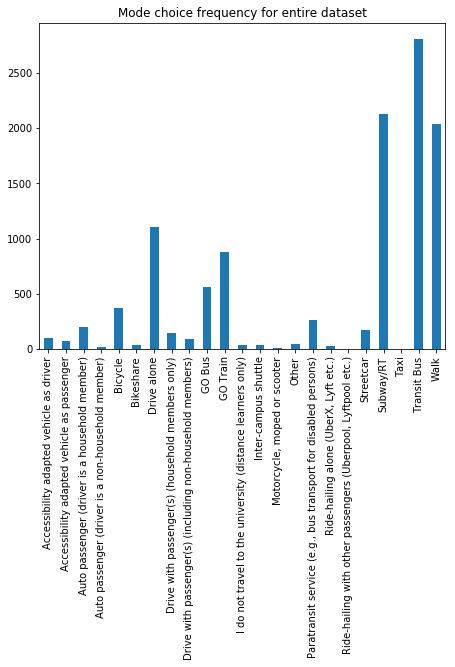

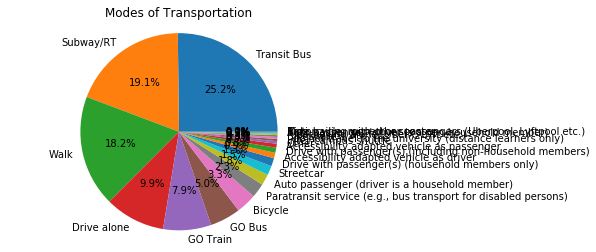

In [12]:
show_distribution('psmainmodefalltypical','Mode')

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Mode choice frequency for entire dataset')
df['psmainmodefalltypical'].value_counts().sort_index().plot(kind='bar')
plt.show()

fig, ax = plt.subplots()
labels= list(df['psmainmodefalltypical'].value_counts().index)
ax.pie(df['psmainmodefalltypical'].value_counts(), labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Modes of Transportation')
plt.show()

### 1.8 Transportation Costs:

In [13]:
print(df['psmonthlytravelcost'].describe())

count    16918.000000
mean       221.530618
std        207.558443
min          0.000000
25%         90.000000
50%        150.000000
75%        300.000000
max       1500.000000
Name: psmonthlytravelcost, dtype: float64


# 2. Household File

This section of the tabulation was done with data from *SMTO_2015_Segmented.csv*. We created this file from specific columns in the respondents and household data, ensuring that the order of respondents is the same in both files. We then added a column 'Segment' identifying each respondents' segment, as explained below.

In [14]:
df1.head()

,UniquePsKey_,PsKey_,hhlivingsituation,hhstructure,hhsize,hhnumdependentchildren,numroommates,hhvehiclenumber,hhbuildingtype,yearslivingincurrentresidence,...,hhownership,familyincomelevel,HmCTuid,HmTTS2006,HmPD,HmRegion,HmFSA2016,tripsdatekey,TolTp,surveyComplDate
0,1,9,Live with family/parents,Non-family adults residing together,6.0,0.0,NaN,0.0,Single detached house,Less than 1 year,...,Unknown,NaN,5350527.01,3851.0,36.0,4.0,L5B,10/2/2019,NaN,10/3/2019
1,2,11,Live with family/parents,Other,2.0,0.0,NaN,1.0,Apartment or Condo,More than 10 years,...,Tenant,NaN,5350287.02,181.0,4.0,1.0,M6A,10/2/2019,3.0,10/3/2019
2,3,14,Live with family/parents,Single person with one or more children,4.0,0.0,NaN,2.0,Row/Townhouse (attached),1-2 years,...,Tenant,I don't know,5350804.07,1039.0,20.0,2.0,L1V,10/2/2019,2.0,10/3/2019
3,4,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5350133,191.0,4.0,1.0,M5N,10/2/2019,NaN,10/3/2019
4,5,17,Live with family/parents,Non-family adults residing together,6.0,1.0,NaN,1.0,I don't know,4-5 years,...,Owner,NaN,5350378.22,600.0,16.0,1.0,M1V,10/2/2019,2.0,10/3/2019


## 2.1. Living Situation Distribution

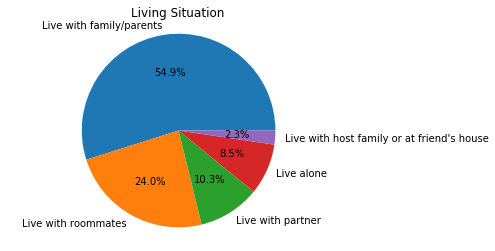

In [15]:
fig, ax = plt.subplots()
labels= list(df1['hhlivingsituation'].value_counts().index)
ax.pie(df1['hhlivingsituation'].value_counts(), labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Living Situation')
plt.show()

## 2.1. Family Structure Distribution

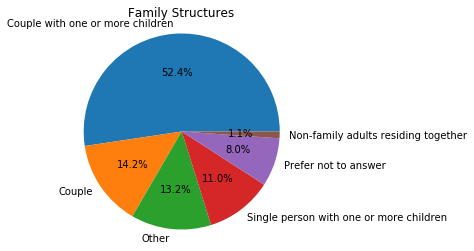

In [16]:
fig, ax = plt.subplots()
labels= list(df1['hhstructure'].value_counts().index)
ax.pie(df1['hhstructure'].value_counts(), labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Family Structures')
plt.show()

## 2.2. Building Type Distribution

In [28]:
df1['hhbuildingtype'].value_counts(sort = True)

Single detached house                 4668
Apartment or Condo                    3311
Row/Townhouse (attached)              1161
Semi-detached house                   1086
On-campus residence                    678
Prefer not to answer                   256
I don't know                           206
Other (Ex: mobile home, chalet...)      97
Name: hhbuildingtype, dtype: int64

## 2.3. Income Distribution

In [24]:
df1['familyincomelevel'].value_counts(sort = True)

I don't know            1290
Prefer not to answer     807
$ 15,000 - 29,999        647
$ 100,000 - 124,999      623
$ 50,000 - 59,999        541
Less than $ 14,999       512
$ 40,000 - 49,999        491
$ 30,000 - 39,999        483
$ 60,000 - 69,999        457
$ 70,000 - 79,999        357
$ 80,000 - 89,999        340
$ 200,000 +              333
$ 90,000 - 99,999        330
$ 150,000 - 199,999      319
$ 125,000 - 149,999      319
Name: familyincomelevel, dtype: int64



# Next Steps

